In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import pickle
import warnings
warnings.filterwarnings('ignore')

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# Filter warnings
warnings.filterwarnings('ignore') #filter warnings
# Show plots inline
%matplotlib inline

In [2]:
ping_df = pd.read_csv('ping_training_data.csv', delimiter='\t')
voice_df = pd.read_csv('voice_training_data.csv', delimiter='\t')
dns_df = pd.read_csv('dns_training_data.csv', delimiter='\t')
telnet_df = pd.read_csv('telnet_training_data.csv', delimiter='\t')
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

In [3]:
df.isnull().value_counts()

Forward Packets  Forward Bytes  Delta Forward Packets  Delta Forward Bytes  Forward Instantaneous Packets per Second  Forward Average Packets per second  Forward Instantaneous Bytes per Second  Forward Average Bytes per second  Reverse Packets  Reverse Bytes  Delta Reverse Packets  Delta Reverse Bytes  DeltaReverse Instantaneous Packets per Second  Reverse Average Packets per second  Reverse Instantaneous Bytes per Second  Reverse Average Bytes per second  Traffic Type
False            False          False                  False                False                                     False                               False                                   False                             False            False          False                  False                False                                          False                               False                                   False                             False           5242
                                            

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5243 entries, 0 to 5242
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Forward Packets                                5243 non-null   int64  
 1   Forward Bytes                                  5243 non-null   int64  
 2   Delta Forward Packets                          5243 non-null   int64  
 3   Delta Forward Bytes                            5243 non-null   int64  
 4   Forward Instantaneous Packets per Second       5243 non-null   float64
 5   Forward Average Packets per second             5243 non-null   float64
 6   Forward Instantaneous Bytes per Second         5242 non-null   float64
 7   Forward Average Bytes per second               5242 non-null   float64
 8   Reverse Packets                                5242 non-null   float64
 9   Reverse Bytes                                  5242 

In [5]:
print(df.shape)


(5243, 17)


In [6]:
df.dropna(inplace=True)


In [7]:
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)

Now we have 5242 rows and 13 columns (12 features, 1 target)



In [8]:
print(df.shape)


(5242, 13)


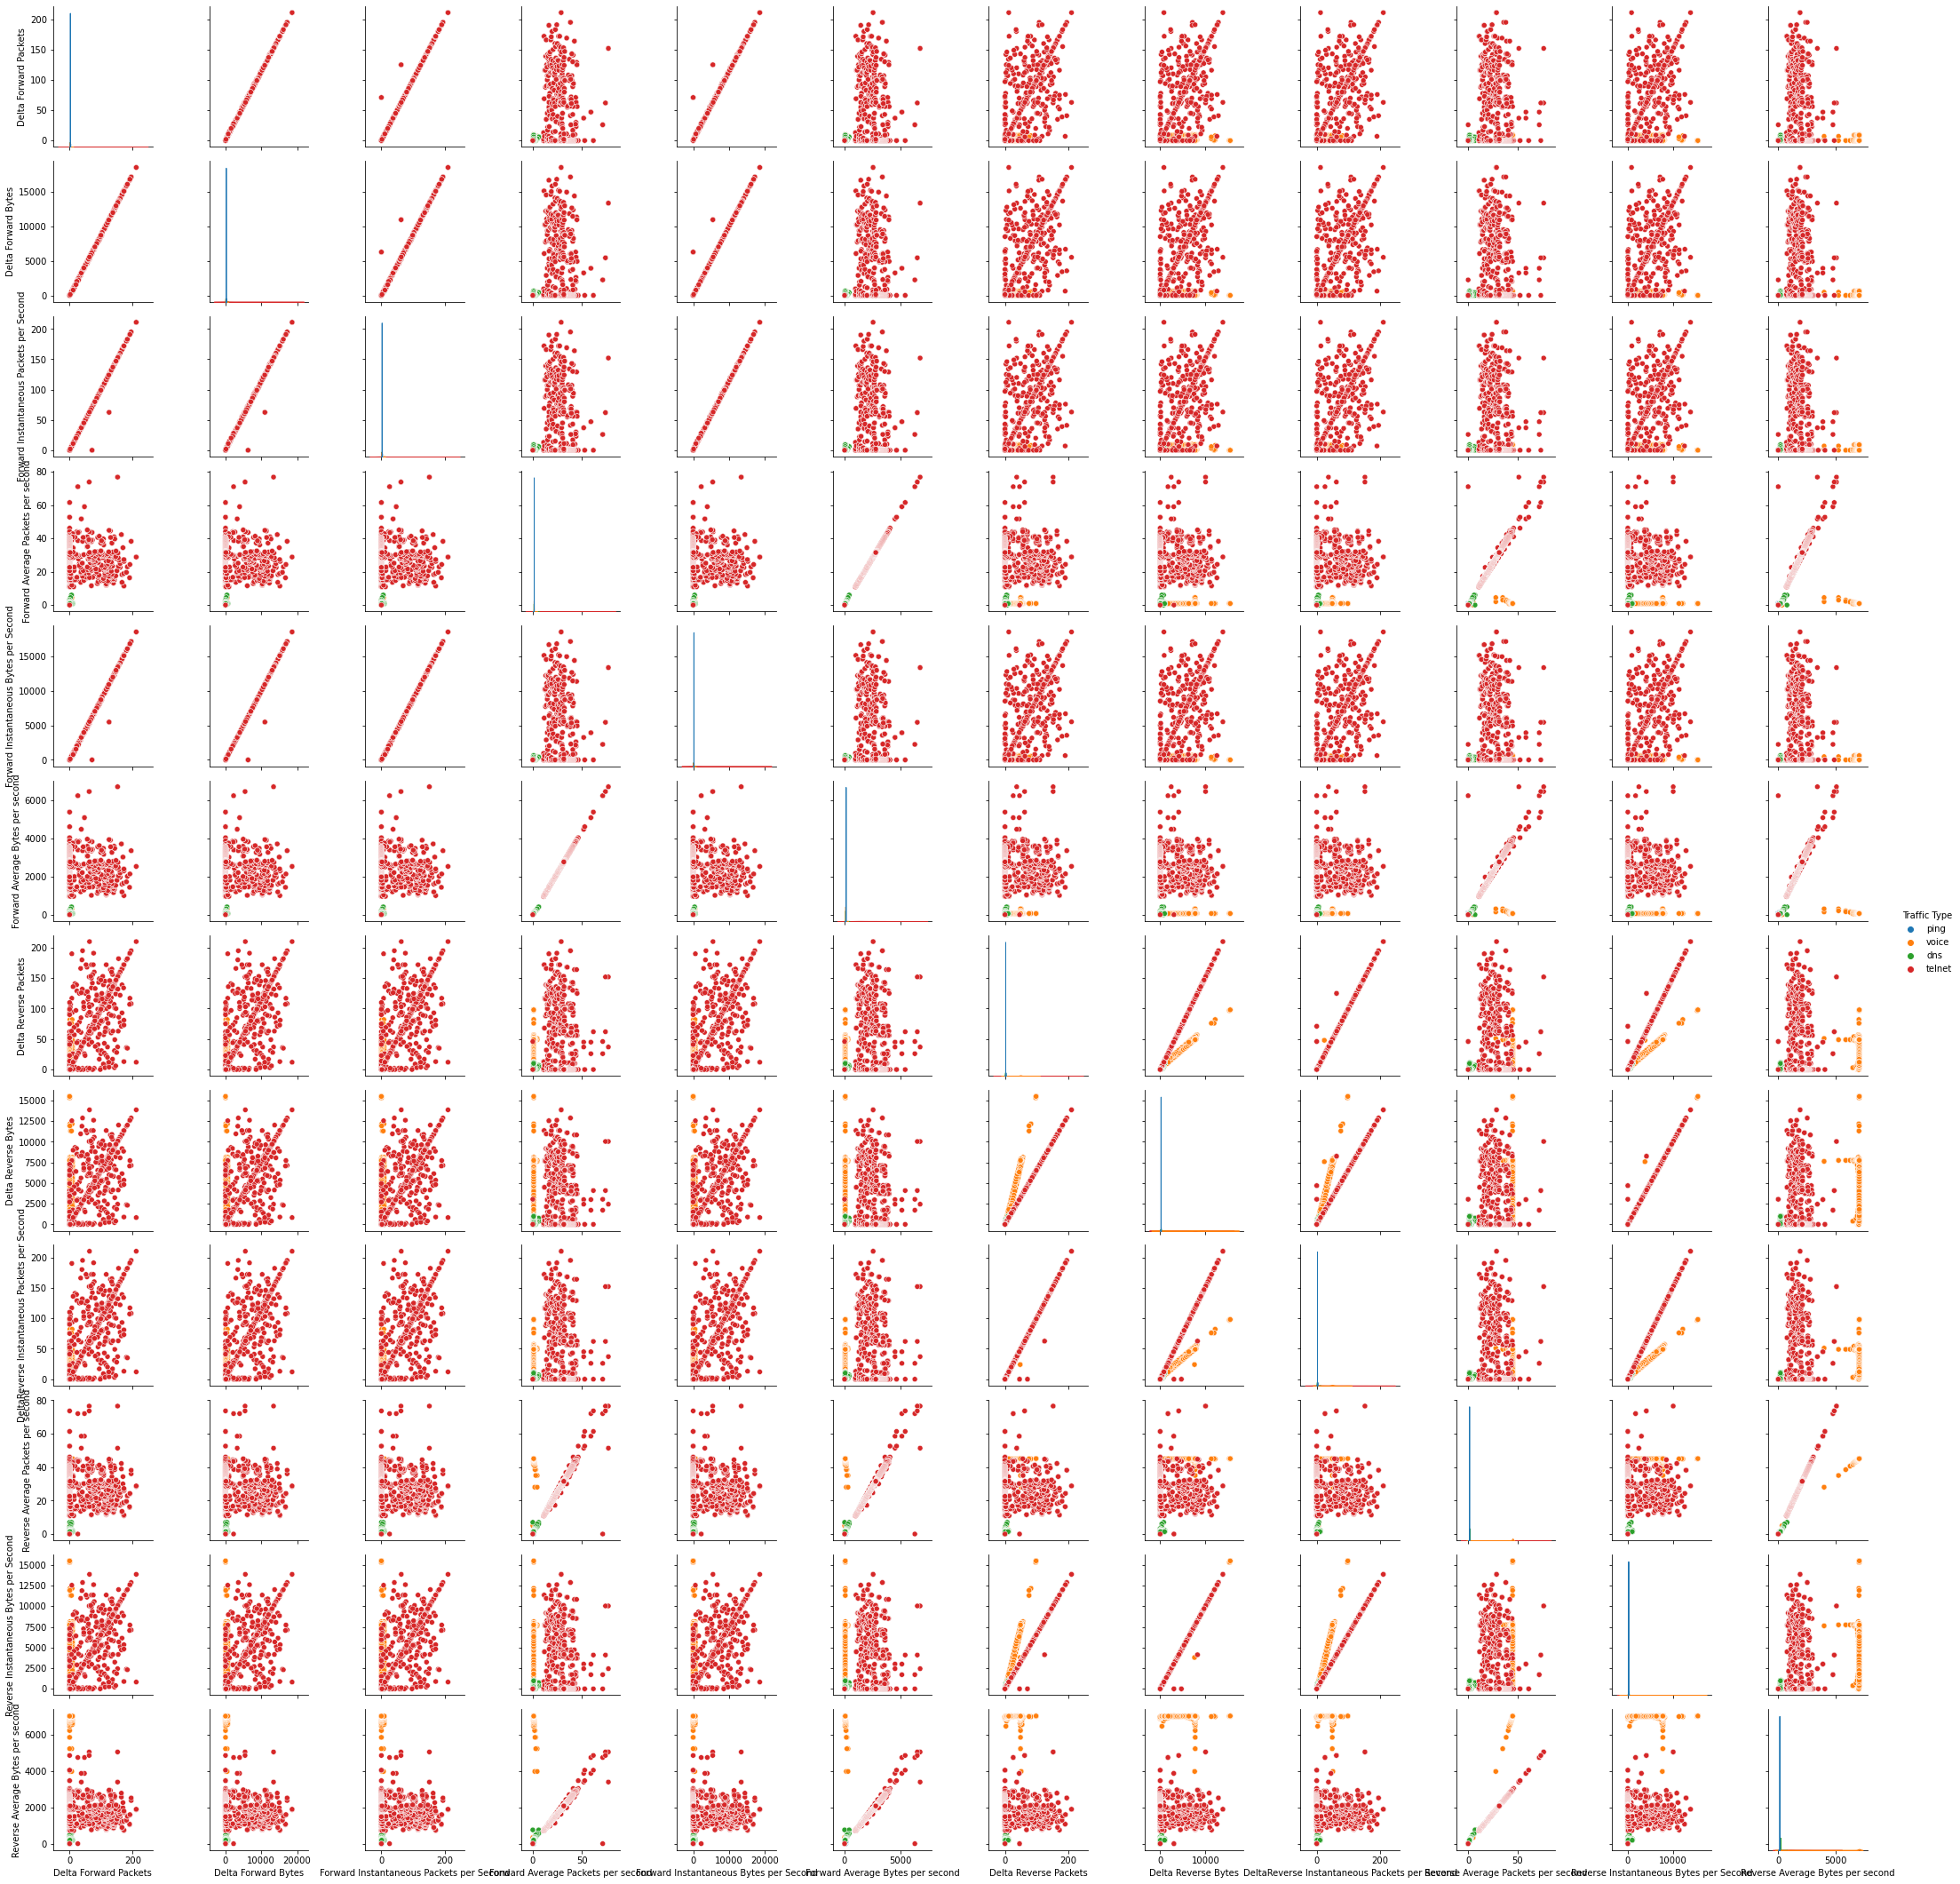

In [9]:
sns.pairplot(df,hue='Traffic Type')

In [10]:
df.head(5)

,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second,Traffic Type
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
1,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
2,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
3,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
4,1,98,1.0,1.0,98.0,98.0,1.0,98.0,1.0,0.5,98.0,49.0,ping


In [11]:
df.isnull().sum()


Delta Forward Packets                            0
Delta Forward Bytes                              0
Forward Instantaneous Packets per Second         0
Forward Average Packets per second               0
Forward Instantaneous Bytes per Second           0
Forward Average Bytes per second                 0
Delta Reverse Packets                            0
Delta Reverse Bytes                              0
DeltaReverse Instantaneous Packets per Second    0
Reverse Average Packets per second               0
Reverse Instantaneous Bytes per Second           0
Reverse Average Bytes per second                 0
Traffic Type                                     0
dtype: int64

In [12]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Delta Forward Packets,5242.0,7.814765,27.445539,0.0,0.000000,1.000000,1.000000,211.000000
Delta Forward Bytes,5242.0,682.359214,2417.020821,0.0,0.000000,66.000000,98.000000,18581.000000
Forward Instantaneous Packets per Second,5242.0,7.763640,27.343341,0.0,0.000000,1.000000,1.000000,211.000000
Forward Average Packets per second,5242.0,6.094360,10.656380,0.0,0.909309,1.021459,1.038462,76.750000
Forward Instantaneous Bytes per Second,5242.0,677.842999,2407.997270,0.0,0.000000,66.000000,98.000000,18581.000000
Forward Average Bytes per second,5242.0,530.202926,937.773493,0.0,62.009611,98.762821,99.485632,6711.000000
Delta Reverse Packets,5242.0,17.525754,31.726859,0.0,1.000000,1.000000,37.000000,210.000000
Delta Reverse Bytes,5242.0,2070.781000,3404.747532,0.0,71.000000,98.000000,3696.000000,15484.000000
DeltaReverse Instantaneous Packets per Second,5242.0,17.447921,31.645749,0.0,1.000000,1.000000,37.000000,210.000000
Reverse Average Packets per second,5242.0,15.710718,18.427478,0.0,1.020725,1.430508,34.969697,76.500000


In [13]:
#Frequency distribution of classes
df_outcome = pd.crosstab(index=df['Traffic Type'], # Make a crosstab
                        columns="count")           #name ths count column

In [14]:
df_outcome

col_0,count
Traffic Type,
dns,1154
ping,1770
telnet,1181
voice,1137


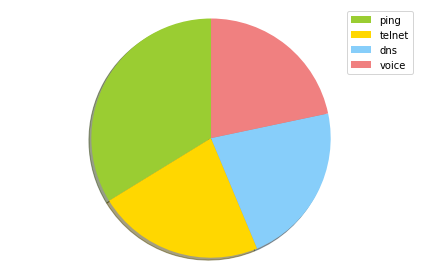

In [15]:
# Visualizing Outcome Distribution 
temp = df["Traffic Type"].value_counts()
df_temp = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = df_temp['labels']
sizes = df_temp['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Traffic Type', ylabel='count'>

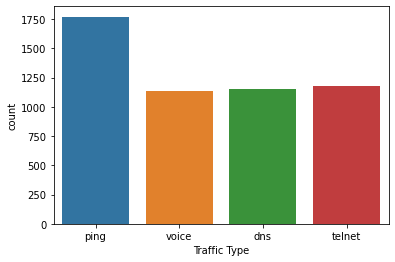

In [16]:
sns.countplot(df['Traffic Type'])


In [17]:
df.head(5)

,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second,Traffic Type
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
1,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
2,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
3,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,ping
4,1,98,1.0,1.0,98.0,98.0,1.0,98.0,1.0,0.5,98.0,49.0,ping


In [18]:
df['Traffic Type'] = df['Traffic Type'].astype('category')


In [19]:
df['Traffic Type'].cat.categories


Index(['dns', 'ping', 'telnet', 'voice'], dtype='object')

In [20]:
df['Traffic Type'].cat.codes.head(-10)


0       1
1       1
2       1
3       1
4       1
       ..
5228    2
5229    2
5230    2
5231    2
5232    2
Length: 5232, dtype: int8

In [21]:
df['Traffic Type'].value_counts()

ping      1770
telnet    1181
dns       1154
voice     1137
Name: Traffic Type, dtype: int64

##  Supervised Model - Logistic Regression

First we will split the dataset into features and targets.



In [22]:
X = df.drop('Traffic Type',axis=1)
y = df['Traffic Type']

In [23]:
X.head() #Only features

,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,98,1.0,1.0,98.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,98,1.0,1.0,98.0,98.0,1.0,98.0,1.0,0.5,98.0,49.0


In [24]:
y.head() #only targets

0    ping
1    ping
2    ping
3    ping
4    ping
Name: Traffic Type, dtype: category
Categories (4, object): ['dns', 'ping', 'telnet', 'voice']

## Splitting our dataset into training and testing dataset

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [26]:
X_train.shape

(3669, 12)

In [27]:
X_test.head()

,Delta Forward Packets,Delta Forward Bytes,Forward Instantaneous Packets per Second,Forward Average Packets per second,Forward Instantaneous Bytes per Second,Forward Average Bytes per second,Delta Reverse Packets,Delta Reverse Bytes,DeltaReverse Instantaneous Packets per Second,Reverse Average Packets per second,Reverse Instantaneous Bytes per Second,Reverse Average Bytes per second
3156,0,0,0.0,0.879032,0.0,59.967742,1.0,261.0,1.0,1.451613,261.0,196.483871
2530,0,0,0.0,0.923684,0.0,62.989474,49.0,7742.0,49.0,44.992126,7742.0,7023.078740
3129,0,0,0.0,0.900000,0.0,61.400000,1.0,164.0,1.0,1.468468,164.0,194.234234
2301,0,0,0.0,0.905660,0.0,61.766038,50.0,7813.0,50.0,45.184906,7813.0,7054.188679
2746,6,410,6.0,0.918033,410.0,62.602459,52.0,7784.0,52.0,45.020450,7784.0,7027.392638


In [28]:
y_train.shape

(3669,)

In [29]:
y_test.shape

(1573,)

In [30]:
df.shape

(5242, 13)

In [31]:
# Transforming non numerical labels into numerical labels
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [32]:
# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# encoding train labels 
encoder.fit(y_train)
Y_train = encoder.transform(y_train)

# encoding test labels 
encoder.fit(y_test)
Y_test = encoder.transform(y_test)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))

names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (3669, 12)
Dimension of Test set (1573, 12) 

Number of numeric features: 12


In [33]:
X_train_scaled.shape

(3669, 12)

In [34]:
X_test_scaled.shape

(1573, 12)

In [35]:
X_test_scaled

array([[-0.28634577, -0.2841475 , -0.28521598, ..., -0.77420263,
        -0.52676129, -0.63632259],
       [-0.28634577, -0.2841475 , -0.28521598, ...,  1.59583861,
         1.68062998,  1.86252406],
       [-0.28634577, -0.2841475 , -0.28521598, ..., -0.77328513,
        -0.55538272, -0.63714606],
       ...,
       [-0.24909696, -0.24268977, -0.24775822, ..., -0.79767817,
        -0.5748571 , -0.672129  ],
       [-0.28634577, -0.2841475 , -0.28521598, ...,  1.59875957,
         1.68062998,  1.8657206 ],
       [-0.28634577, -0.2841475 , -0.28521598, ..., -0.22600155,
        -0.6037736 , -0.42969629]])

### Hyperparameter tuning using grid search and cross validation


In [36]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


### Training SVM model using radial kernel

In [37]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [38]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(encoder.inverse_transform(Y_pred))


Best score for training data: 0.9989100817438693 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [39]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Traffic Type'], colnames=['Predicted Traffic Type']))
cm = confusion_matrix(Y_test.astype(int).astype(str),Y_pred.astype(int).astype(str))
print(cm)
print("\n")

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score

[[352   2   0   0]
 [  1 524   0   0]
 [  0   0 346   0]
 [  2   0   0 346]]


Training set score for SVM: 0.999182
Testing  set score for SVM: 0.996821


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

In [40]:
Y_test

array([0, 3, 0, ..., 1, 3, 2])

In [41]:
Y_pred

array([0, 3, 0, ..., 1, 3, 2])

To attach labels, we can view it as a dataframe:



In [42]:
cmDF = pd.DataFrame()

for i, row in enumerate(y.cat.categories):
    temp={}
    for j, col in enumerate(y.cat.categories):
        temp[col] =cm[i,j]
    cmDF = cmDF.append(pd.DataFrame.from_dict({row:temp}, orient='index'))
    
print(cmDF)

        dns  ping  telnet  voice
dns     352     2       0      0
ping      1   524       0      0
telnet    0     0     346      0
voice     2     0       0    346


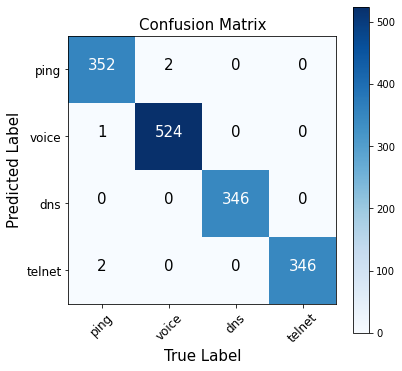

In [43]:
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15)
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45, fontsize=12)
plt.yticks(tick_marks, y.unique(), fontsize=12)
plt.xlabel('True Label', fontsize=15)
plt.ylabel('Predicted Label', fontsize=15)

for i in range(len(cm)):
    for j in range(len(cm[i])):
        color = 'black'   
        if cm[i][j] > 5:
            color = 'white'
        plt.text(j, i, format(cm[i][j]), 
                horizontalalignment='center',
                color=color, fontsize=15)
       

In [44]:
from sklearn.metrics import classification_report

# printing the report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       354
           1       1.00      1.00      1.00       525
           2       1.00      1.00      1.00       346
           3       1.00      0.99      1.00       348

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573



In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [46]:
df.drop('Traffic Type', axis=1).values[0:5]

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 1. , 98. ,  1. ,  1. , 98. , 98. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 1. , 98. ,  1. ,  1. , 98. , 98. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 1. , 98. ,  1. ,  1. , 98. , 98. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ],
       [ 1. , 98. ,  1. ,  1. , 98. , 98. ,  1. , 98. ,  1. ,  0.5, 98. ,
        49. ]])

In [47]:
scaler = StandardScaler()
scaler.fit(df.drop('Traffic Type',axis=1))

StandardScaler()

In [48]:
scaled_data = scaler.transform(df.drop('Traffic Type',axis=1))
scaled_data[0:5]

array([[-0.28476434, -0.2823411 , -0.28395873, -0.5719523 , -0.28152344,
        -0.56543879, -0.55244754, -0.608262  , -0.55140377, -0.85265146,
        -0.60710859, -0.70950218],
       [-0.24832507, -0.24179145, -0.24738327, -0.47810285, -0.24082183,
        -0.46092597, -0.55244754, -0.608262  , -0.55140377, -0.85265146,
        -0.60710859, -0.70950218],
       [-0.24832507, -0.24179145, -0.24738327, -0.47810285, -0.24082183,
        -0.46092597, -0.55244754, -0.608262  , -0.55140377, -0.85265146,
        -0.60710859, -0.70950218],
       [-0.24832507, -0.24179145, -0.24738327, -0.47810285, -0.24082183,
        -0.46092597, -0.55244754, -0.608262  , -0.55140377, -0.85265146,
        -0.60710859, -0.70950218],
       [-0.24832507, -0.24179145, -0.24738327, -0.47810285, -0.24082183,
        -0.46092597, -0.5209255 , -0.57947592, -0.51980094, -0.82551548,
        -0.57829381, -0.69161707]])

In [49]:
scaled_data.mean(axis=0)

array([ 0.00000000e+00, -2.16876837e-17,  0.00000000e+00,  1.73501469e-16,
       -2.16876837e-17,  0.00000000e+00, -5.42192091e-17,  3.25315255e-17,
        3.25315255e-17, -5.42192091e-17, -9.21726555e-17, -2.16876837e-17])

In [50]:
scaled_data.std(axis=0)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Now we will fit PCA model to the data. We will specify n_components=2, because we only want the first 2 principal components.



In [51]:
pca = PCA(n_components=4)
pca.fit(scaled_data)

PCA(n_components=4)

In [52]:
x_pca = pca.transform(scaled_data)


In [81]:
x_pca

array([[-1.66130677,  0.53993075, -0.69772039, -0.08585873],
       [-1.57466692,  0.63366595, -0.60721756, -0.08992045],
       [-1.57466692,  0.63366595, -0.60721756, -0.08992045],
       ...,
       [-0.00481654,  1.16772638,  3.5300488 , -0.06840914],
       [-0.00573427,  1.16925778,  3.52876731, -0.07024049],
       [ 0.07541129,  1.23811988,  3.47971277, -0.01528991]])

In [53]:
scaled_data.shape


(5242, 12)

Explained Variance


In [54]:
print(pca.explained_variance_ratio_)
pca.explained_variance_ratio_.sum()*100


[0.5646886  0.2769479  0.12736141 0.02711204]


99.61099545337268

From above you can see that our first 2 principal components explain 84.16% of the variance in our data. We can get higher variance explained by increasing the number of principal components to a maximum of 100% with n_components = n_features.

## Plotting the principal components


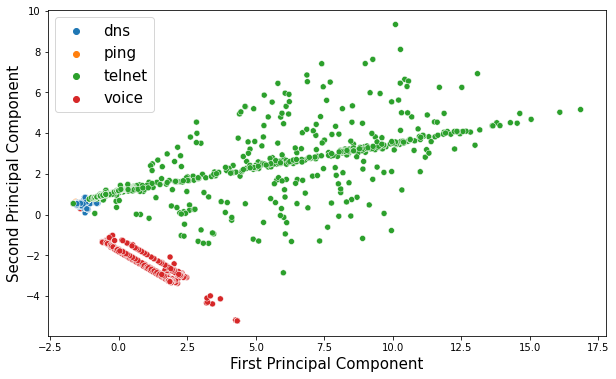

In [55]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=df['Traffic Type'])
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)
plt.legend(fontsize=15)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(x_pca,y.cat.codes,test_size=0.3, random_state=101)
X_train, X_test, y_train, y_test

(array([[-0.83258953,  0.85466722,  1.41774181, -0.07776846],
        [ 2.07286554,  1.63100559,  2.35996229, -0.11047368],
        [-1.52314847,  0.445871  , -0.59519278, -0.10480338],
        ...,
        [-1.51482979,  0.57275093, -0.59037833, -0.08439648],
        [-1.51482642,  0.57274551, -0.59037352, -0.08438994],
        [-0.67254864,  0.91402631,  1.82547439, -0.07482721]]),
 array([[-1.53410792,  0.46031224, -0.58902404, -0.09704294],
        [ 1.86403301, -3.28717017,  0.04465868,  0.13827024],
        [-1.550234  ,  0.48049142, -0.58257556, -0.08680771],
        ...,
        [-1.51483863,  0.5727566 , -0.59039577, -0.08440532],
        [ 1.86510702, -3.28980546,  0.0456791 ,  0.14123198],
        [-1.05594426,  0.76971376,  0.84751422, -0.0798267 ]]),
 4575    2
 5151    2
 3070    0
 4967    2
 4569    2
        ..
 4172    2
 599     1
 1361    1
 1547    1
 4960    2
 Length: 3669, dtype: int8,
 3156    0
 2530    3
 3129    0
 2301    3
 2746    3
        ..
 3336    0


In [57]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [89]:
X_test.shape

(1573, 4)

In [58]:
predictions = model.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(predictions,y_test)*100))

Accuracy: 98.60%


In [84]:
predictions

array([0, 3, 0, ..., 1, 3, 2], dtype=int8)

In [85]:
y_test

3156    0
2530    3
3129    0
2301    3
2746    3
       ..
3336    0
749     1
1181    1
2861    3
4765    2
Length: 1573, dtype: int8

In [86]:
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       354
           1       0.96      1.00      0.98       525
           2       1.00      1.00      1.00       346
           3       1.00      0.99      1.00       348

    accuracy                           0.99      1573
   macro avg       0.99      0.98      0.99      1573
weighted avg       0.99      0.99      0.99      1573



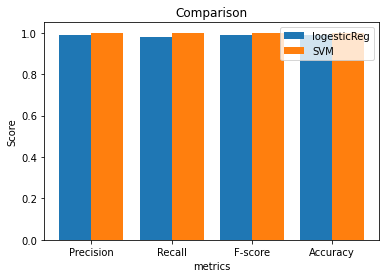

In [88]:
import numpy as np
import matplotlib.pyplot as plt

metrics_names = ['Precision','Recall','F-score','Accuracy']
LG = [0.99, 0.98, 0.99 , 0.99]
SVM = [1,1,1,1]

X_axis = np.arange(len(metrics_names))

plt.bar(X_axis - 0.2, LG, 0.4, label = 'logesticReg')
plt.bar(X_axis + 0.2, SVM, 0.4, label = 'SVM')

plt.xticks(X_axis, metrics_names)
plt.xlabel("metrics")
plt.ylabel("Score")
plt.title("Comparison")
plt.legend()
plt.show()


In [ ]:
          1573